In [38]:
# Import necessary libraries for data analysis and visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
# Load the Zomato dataset and create a copy for analysis
zomato_data = pd.read_csv("Zomato-data.csv")
df = zomato_data.copy()
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [40]:
# Remove duplicate entries to ensure data quality
df = df.drop_duplicates()

In [41]:
# Extract the numeric rating from the 'rate' column
df['rate'] = df['rate'].str.split('/').str[0].astype(float)

In [42]:
# Display information about the DataFrame to understand column types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148 entries, 0 to 148
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 9.2+ KB


Text(0.5, 0, 'Types of restaurant')

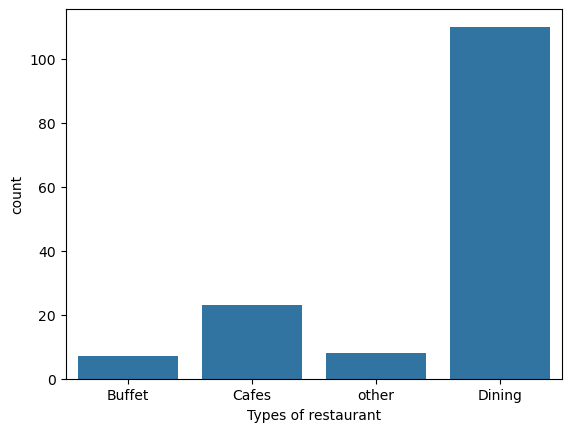

In [43]:
# --- Analysis 1: Types of Restaurant ---
# Visualize the distribution of restaurant types
sns.countplot(x = df['listed_in(type)'])
plt.xlabel("Types of restaurant")

*Conclusion: The majority of the restaurants fall into the dining category.*

Text(0.5, 1.0, 'Count of votes')

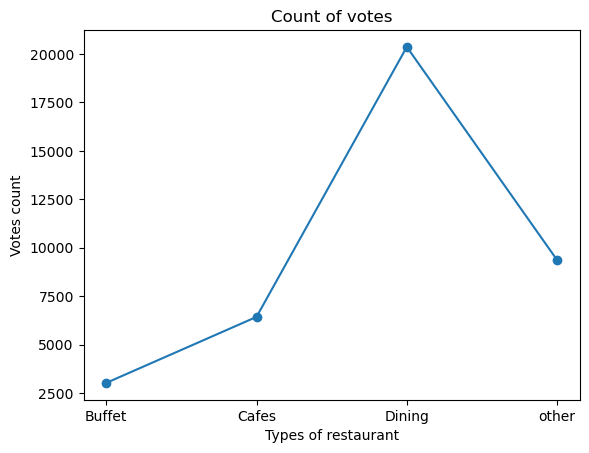

In [44]:
# --- Analysis 2: Votes by Restaurant Type ---
# Group votes by restaurant type and plot the results
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, marker='o')
plt.ylabel("Votes count")
plt.xlabel("Types of restaurant")
plt.title("Count of votes")

*Conclusion: Large number of individuals preferred Dining restaurants*

In [45]:
# --- Analysis 3: Most Voted Restaurant ---
# Identify the restaurant with the highest number of votes
max_votes = df['votes'].max()
restaurant_with_max_votes = df.loc[df['votes'] == max_votes, 'name']
print("Restaurant with max votes:")
print(restaurant_with_max_votes)

Restaurant with max votes:
38    Empire Restaurant
Name: name, dtype: object


Conclusion: Empire Restaurant restaurant is the most popular based on user votes.

[]

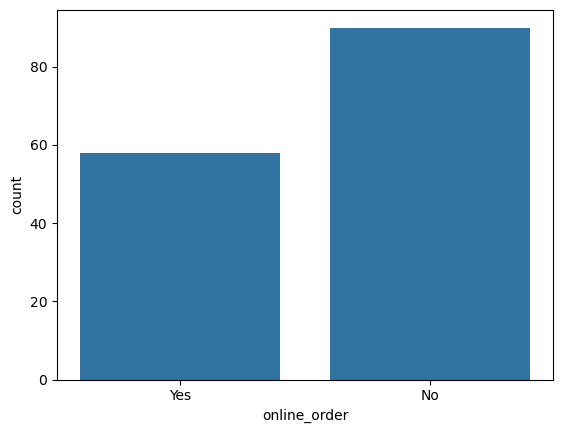

In [46]:
# --- Analysis 4: Online Order Availability ---
# Visualize the availability of online ordering across restaurants
sns.countplot(x=df['online_order'])
plt.plot()

Conclusion: Shows the distribution of restaurants that offer online ordering.

[]

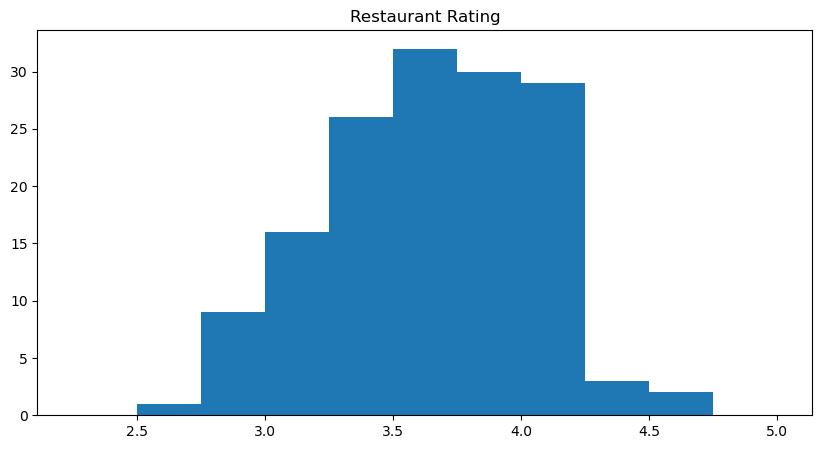

In [47]:
# --- Analysis 5: Restaurant Ratings ---
# Plot the distribution of restaurant ratings
plt.figure(figsize=(10, 5))
plt.hist(df['rate'], bins=[2.25, 2.5, 2.75,3, 3.25, 3.5, 3.75, 4, 4.25, 4.5, 4.75, 5])
plt.title("Restaurant Rating")
plt.plot()


*Conclusion: Majority of Restaurants have rating between 3.25 to 4.25*

37.16% of couples prefer restaurants with an cost range of 150-300 rupees


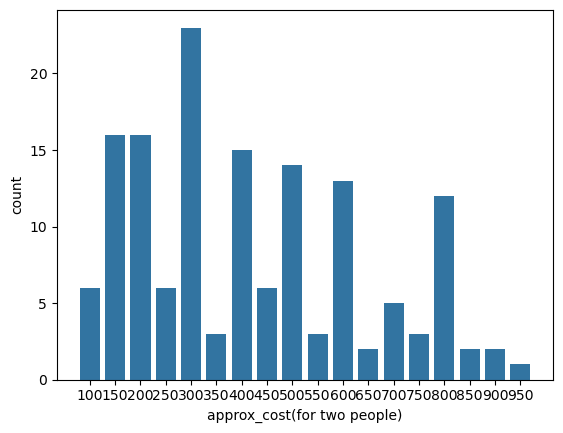

In [48]:
# --- Analysis 6: Approximate Cost for Couples ---
# Calculate and visualize the most preferred cost range for couples
per_of_person =((df['approx_cost(for two people)']
                .value_counts().head(3).sum()/
                 df['approx_cost(for two people)']
                .value_counts().sum())*100)
sns.countplot(x=df['approx_cost(for two people)'])
plt.plot()
print(f"{per_of_person:.2f}% of couples prefer restaurants with an cost range of 150-300 rupees")

<Axes: xlabel='online_order', ylabel='rate'>

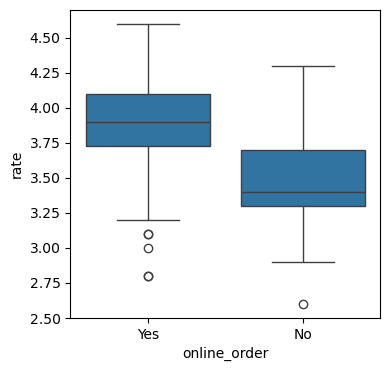

In [49]:
# --- Analysis 7: Ratings by Order Mode ---
# Compare ratings between online and offline orders
plt.figure(figsize=(4, 4))
sns.boxplot(x= 'online_order', y='rate', data= df)

*Conclusion: Offline orders received lower ratings in comparison to online orders which obtained excellent ratings.*

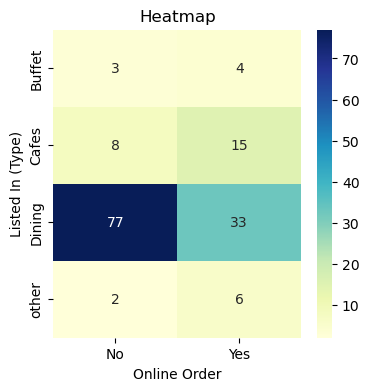

In [50]:
# --- Analysis 8: Order Mode Preferences by Restaurant Type ---
# Create a heatmap to show order mode preferences by restaurant type
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
plt.figure(figsize=(4, 4))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()

Conclusion: Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests clients prefer to place orders in person at restaurants but prefer online ordering at cafes.

# Summary

**The analysis highlights several important patterns in customer preferences and restaurant performance:**

- Dining dominates the market: Most restaurants fall under the dining category, with a large number of individuals preferring this option over alternatives.

- Top performer identified: Empire Restaurant emerges as the most popular restaurant, receiving the highest number of user votes.

- Online ordering trends: A significant proportion of restaurants offer online ordering. While cafés primarily attract online orders, dining restaurants are more focused on offline orders, showing a distinct customer preference split.

- Ratings distribution: The majority of restaurants achieve ratings between 3.25 and 4.25, suggesting a generally satisfactory dining experience across establishments.

- Cost preference among couples: About 37.16% of couples favor restaurants with a moderate cost range of ₹150–₹300, indicating affordability plays a key role in dining choices.

- Order mode vs. ratings: Online orders tend to receive higher ratings compared to offline orders, suggesting that digital platforms may enhance customer satisfaction.

In short:

Customers largely prefer dining-style restaurants, but cafés are gaining traction via online orders. Empire Restaurant stands out as the market leader. Ratings are generally positive, with moderate pricing being most attractive to couples. Interestingly, online ordering is linked with better customer satisfaction, making it a potential growth driver for the industry.